In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.regularizers import l2
import numpy as np

In [2]:
# Chargement les données
data_path = 'turnips2.csv'
data = pd.read_csv(data_path)

# Calcul des profits pour chaque demi-journée
columns = ['Mon-AM', 'Mon-PM', 'Tues-AM', 'Tues-PM', 'Wed-AM', 'Wed-PM', 'Thurs-AM', 'Thurs-PM', 'Fri-AM', 'Fri-PM', 'Sat-AM', 'Sat-PM']
for col in columns:
    data[col] = data[col] - data['Purchase']

# Normalisation les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Clustering pour identifier les tendances
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_scaled)
data['cluster'] = kmeans.labels_

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


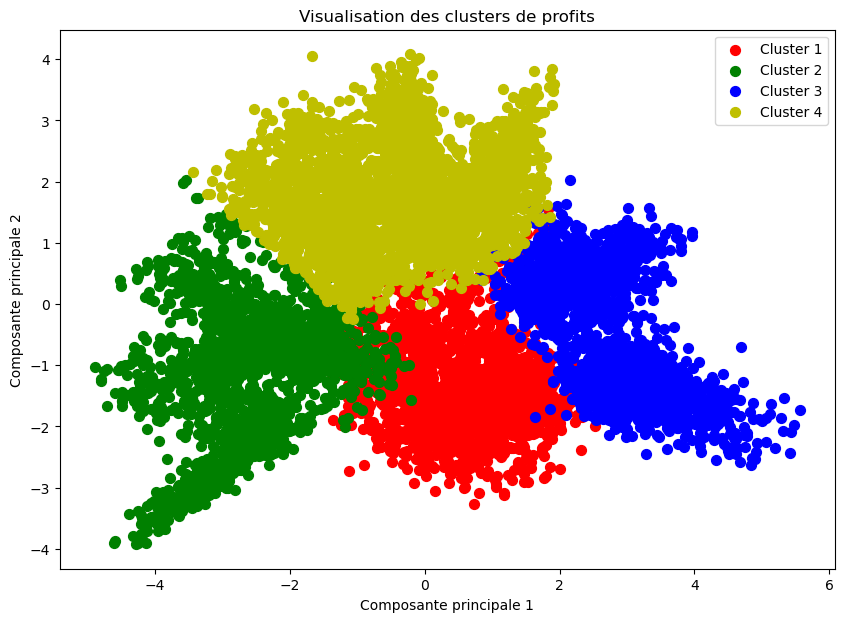

In [3]:
# Réduction de dimensionnalité avec deux ACPs
pca = PCA(n_components=2)  # Réduire à 2 dimensions pour visualisation
data_pca = pca.fit_transform(data_scaled)

# Application du clustering K-Means (si pas déjà fait)
n_clusters = 4  # Ajustez selon votre cas
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_scaled)
clusters = kmeans.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Ajoutez plus de couleurs si vous avez plus de clusters

for i in range(n_clusters):
    plt.scatter(data_pca[clusters == i, 0], data_pca[clusters == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title('Visualisation des clusters de profits')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


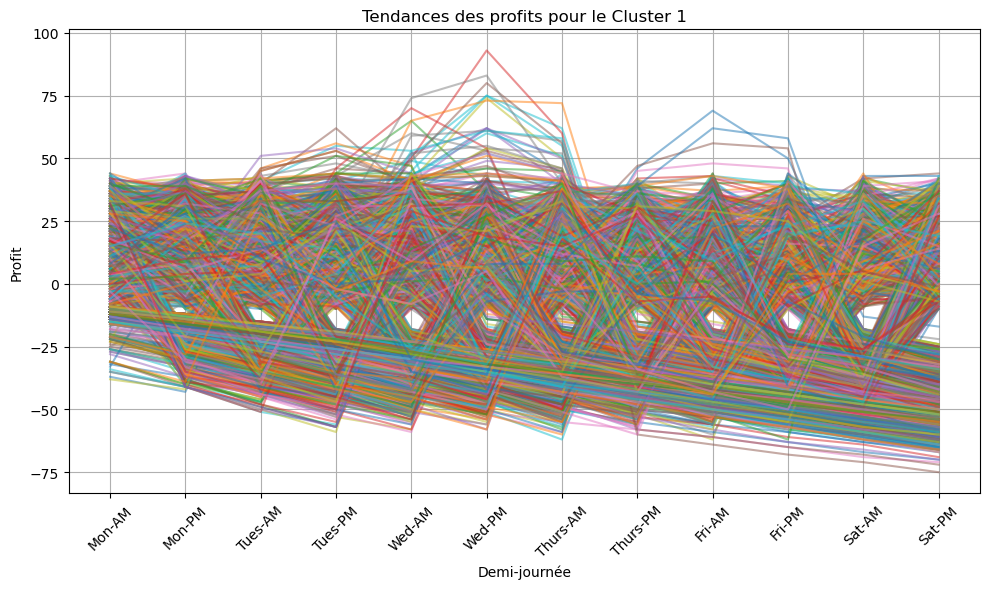

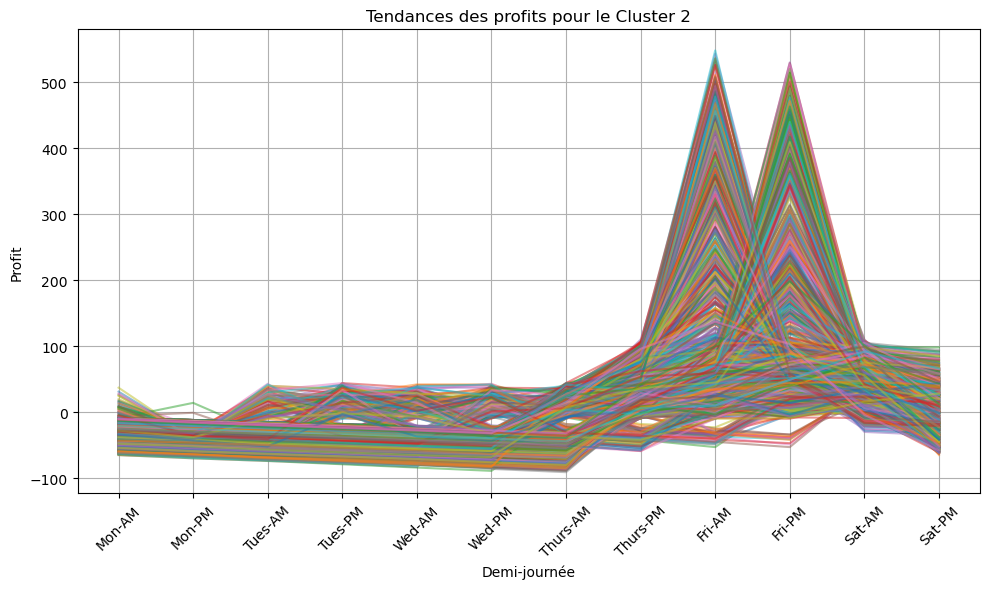

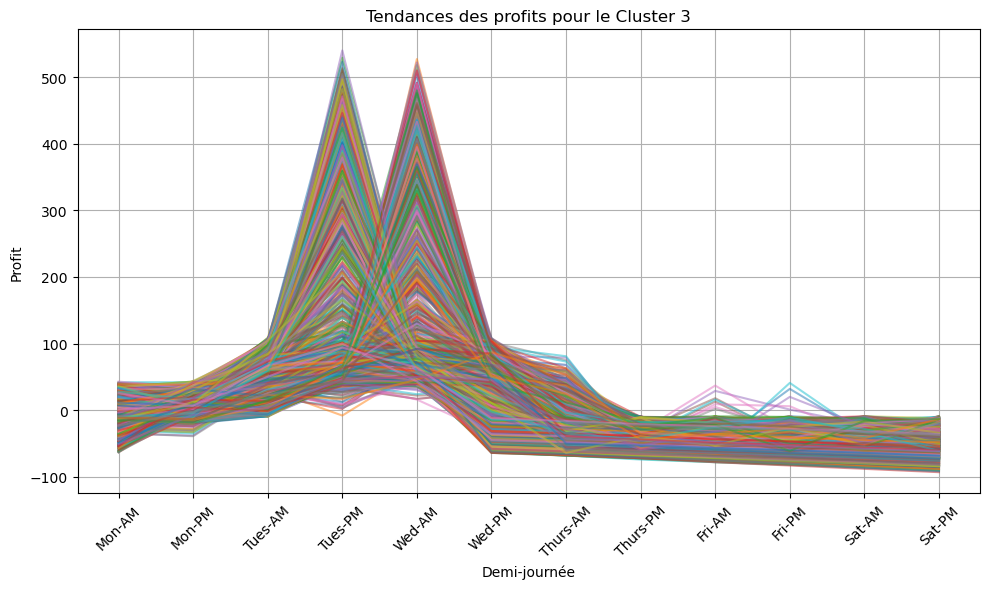

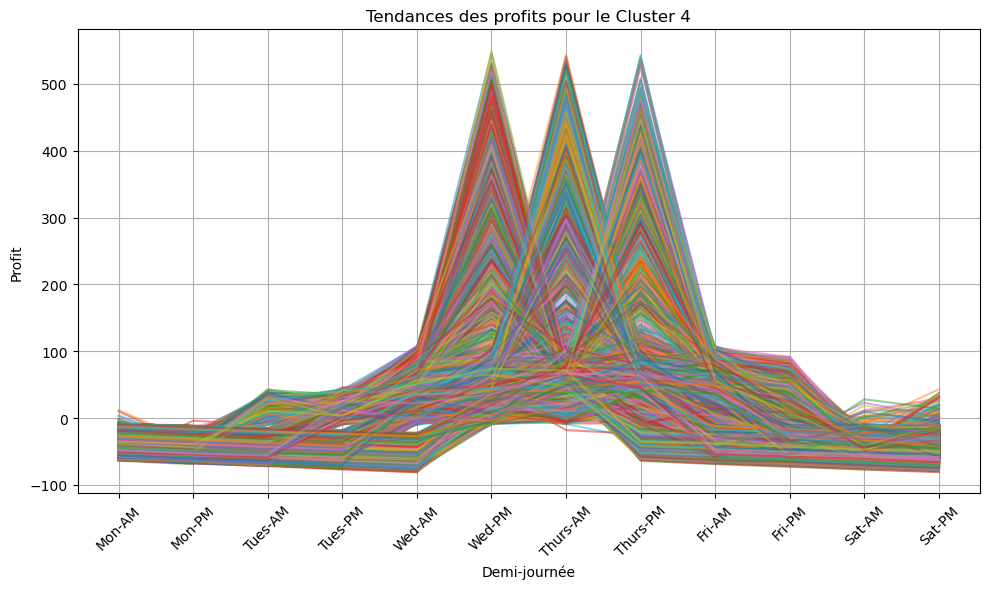

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Chargement des données
data_path = 'turnips2.csv'
data = pd.read_csv(data_path)

# Calcul des profits pour chaque demi-journée
columns = ['Mon-AM', 'Mon-PM', 'Tues-AM', 'Tues-PM', 'Wed-AM', 'Wed-PM', 'Thurs-AM', 'Thurs-PM', 'Fri-AM', 'Fri-PM', 'Sat-AM', 'Sat-PM']
for col in columns:
    data[col] = data[col] - data['Purchase']

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# Clustering pour identifier les tendances
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
data['cluster'] = clusters

# Création des graphiques pour chaque cluster
for i in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == i]
    
    # Initialisation du plot pour ce cluster
    plt.figure(figsize=(10, 6))
    for index, row in cluster_data.iterrows():
        plt.plot(columns, row[columns], alpha=0.5)  # Utilisation d'une opacité réduite pour visualiser les tendances
    
    plt.title(f'Tendances des profits pour le Cluster {i+1}')
    plt.xticks(rotation=45)
    plt.xlabel('Demi-journée')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_scaled)
data['cluster'] = kmeans.labels_

# Calculer les moyennes des caractéristiques (profits) pour chaque cluster
cluster_means = data.groupby('cluster').mean()

# Afficher les moyennes des caractéristiques pour chaque cluster
print(cluster_means)

c:\Users\thuym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           Purchase     Mon-AM     Mon-PM    Tues-AM     Tues-PM      Wed-AM  \
cluster                                                                        
0         99.715902   2.475173  -3.324953  -8.387492  -13.705217  -15.579824   
1        100.071144 -23.377612 -28.438806 -30.599005  -31.072139  -35.248756   
2        100.127986 -11.098976   7.644482  38.684869  123.408987  119.951081   
3        100.008199 -24.905871 -29.111512 -25.684159  -12.864874   13.984257   

            Wed-PM   Thurs-AM   Thurs-PM      Fri-AM      Fri-PM     Sat-AM  \
cluster                                                                       
0       -18.344123 -22.436518 -24.636392  -25.084224  -29.919233 -33.877436   
1       -38.253234 -13.916915  25.825373  101.976119  108.543781  46.320398   
2        27.083049 -22.372582 -38.056314  -39.875427  -42.703641 -44.720705   
3        76.059364  92.821909  76.789767   15.013447  -17.604460 -37.966546   

            Sat-PM  Cluster  
cluster       